In [13]:
# https://udemy.com/recommender-systems
# https://deeplearningcourses.com/recommender-systems
from __future__ import print_function, division
from builtins import range, input

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime
from copy import deepcopy

# carregando dados
import os
if not os.path.exists('user2movie.json') or \
   not os.path.exists('movie2user.json') or \
   not os.path.exists('usermovie2rating.json') or \
   not os.path.exists('usermovie2rating_test.json'):
   import preprocess2dict


with open('user2movie.json', 'rb') as f:
  user2movie = pickle.load(f)

with open('movie2user.json', 'rb') as f:
  movie2user = pickle.load(f)

with open('usermovie2rating.json', 'rb') as f:
  usermovie2rating = pickle.load(f)

with open('usermovie2rating_test.json', 'rb') as f:
  usermovie2rating_test = pickle.load(f)

In [14]:
N = np.max(list(user2movie.keys())) + 1
# filmes dos dados de teste podem não estar nos dados de treino
# para garantir que isso nao aconteca vamos pegar o maior id de filme de ambas as bases
m1 = np.max(list(movie2user.keys()))
m2 = np.max([m for (u, m), r in usermovie2rating_test.items()])
M = max(m1, m2) + 1
print("N:", N, "M:", M)

N: 10000 M: 2000


In [15]:
# convert user2movie and movie2user to include ratings
print("converting...")

# cria dicionario por usuário de todos os filmes que o usuário deu nota e 
# todas as notas para esses filmes(user:f1,f2,f3,f4,{r1,r2,r3,r4})
user2movierating = {}
for i, movies in user2movie.items():
  r = np.array([usermovie2rating[(i,j)] for j in movies])# filmes e nota dos filmes avaliados pelo usuario
  user2movierating[i] = (movies, r)
    
# cria dicionario por filme de todos os usuários que avaliaram os filmes e 
# quais as notas dadas(filme:u1,u2,u3,u4,{r1,r2,r3,r4})
movie2userrating = {}
for j, users in movie2user.items():# para cada usuário 
  r = np.array([usermovie2rating[(i,j)] for i in users])# usuarios e nota dos usuarios para o filme
  movie2userrating[j] = (users, r)

# cria dicionario por filme de todos os usuários que avaliaram os filmes para a base de teste
movie2userrating_test = {}
for (i, j), r in usermovie2rating_test.items():
  if j not in movie2userrating_test:#caso nao tenha o filme, montar item do dicionario
    movie2userrating_test[j] = [[i], [r]]
  else:#caso ja tenha o item, adicionar usuario e nota
    movie2userrating_test[j][0].append(i)
    movie2userrating_test[j][1].append(r)
for j, (users, r) in movie2userrating_test.items():
  movie2userrating_test[j][1] = np.array(r)
print("conversion done")

converting...
conversion done


In [16]:
# inicializando variaveis
# prediction[i,j] = W[i].dot(U[j]) + b[i] + c.T[j] + mu
K = 10 # dimensionalidade latente
W = np.random.randn(N, K)#vetor de features de usuário
b = np.zeros(N)#bias usuários
U = np.random.randn(M, K)#vetor de features de filme
c = np.zeros(M)#bias item
mu = np.mean(list(usermovie2rating.values()))#media global


#trabalhando com vetores
# medindo erro quadratico da previsao
def get_loss(m2u):
  # d: movie_id -> (user_ids, ratings)
  N = 0.
  sse = 0
  for j, (u_ids, r) in m2u.items():# para cada usuário+filme, nota fazer a previsao e medir erro
    p = W[u_ids].dot(U[j]) + b[u_ids] + c[j] + mu #previsao do usuario+filme
    delta = p - r
    sse += delta.dot(delta)
    N += len(r)
  return sse / N

epoch: 0
i: 0 N: 10000
i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
updated W and b: 0:00:08.033369
j: 0 M: 2000
j: 200 M: 2000
j: 400 M: 2000
j: 600 M: 2000
j: 800 M: 2000
j: 1000 M: 2000
j: 1200 M: 2000
j: 1400 M: 2000
j: 1600 M: 2000
j: 1800 M: 2000
updated U and c: 0:00:07.737317
epoch duration: 0:00:15.771684
calculate cost: 0:00:00.953451
train loss: 0.7537614710996463
test loss: 0.7876083461153868
epoch: 1
i: 0 N: 10000
i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
updated W and b: 0:00:08.255726
j: 0 M: 2000
j: 200 M: 2000
j: 400 M: 2000
j: 600 M: 2000
j: 800 M: 2000
j: 1000 M: 2000
j: 1200 M: 2000
j: 1400 M: 2000
j: 1600 M: 2000
j: 1800 M: 2000
updated U and c: 0:00:08.552652
epoch duration: 0:00:16.810373
calculate cost: 0:00:00.982396
train loss: 0.564171972188194

i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
updated W and b: 0:00:04.619355
j: 0 M: 2000
j: 200 M: 2000
j: 400 M: 2000
j: 600 M: 2000
j: 800 M: 2000
j: 1000 M: 2000
j: 1200 M: 2000
j: 1400 M: 2000
j: 1600 M: 2000
j: 1800 M: 2000
updated U and c: 0:00:02.306830
epoch duration: 0:00:06.928179
calculate cost: 0:00:00.921536
train loss: 0.5023249729007475
test loss: 0.5404197315417433
epoch: 17
i: 0 N: 10000
i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
updated W and b: 0:00:03.042861
j: 0 M: 2000
j: 200 M: 2000
j: 400 M: 2000
j: 600 M: 2000
j: 800 M: 2000
j: 1000 M: 2000
j: 1200 M: 2000
j: 1400 M: 2000
j: 1600 M: 2000
j: 1800 M: 2000
updated U and c: 0:00:02.448451
epoch duration: 0:00:05.491312
calculate cost: 0:00:00.979380
train loss: 0.5023022011762585
test loss: 0.5404020

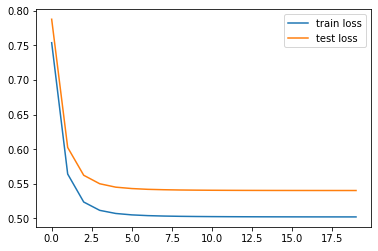

In [17]:
epochs = 20
reg = 0.1 # regularization penalty
train_losses = []
test_losses = []

# train the parameters

for epoch in range(epochs):
  print("epoch:", epoch)
  epoch_start = datetime.now()#medindo performance datetime
  # preenchendo as variaveis

  t0 = datetime.now()
  # update W and b
  # loop para cada usuario para calcualar W[i](vetor de 
  # features do usuário) e b[i](bias do usuário)
  for i in range(N):
    m_ids, r = user2movierating[i]# notas dos filmes do usuario
    matrix = U[m_ids].T.dot(U[m_ids]) + np.eye(K) * reg # produto externo do vetor de features do filme com ele mesmo+matriz de regularizacao
    vector = (r - b[i] - c[m_ids] - mu).dot(U[m_ids])# vetor de features do usuario
    bi = (r - U[m_ids].dot(W[i]) - c[m_ids] - mu).sum()# bias das notas do usuario

    # set the updates
    W[i] = np.linalg.solve(matrix, vector)
    b[i] = bi / (len(user2movie[i]) + reg)

    if i % (N//10) == 0:
      print("i:", i, "N:", N)
  print("updated W and b:", datetime.now() - t0)


  # preenchendo "U" and "c"
    
  t0 = datetime.now()

  for j in range(M):
    try:
      u_ids, r = movie2userrating[j]# notas dos usuários para o filme
      matrix = W[u_ids].T.dot(W[u_ids]) + np.eye(K) * reg# produto externo do vetor de features do usuario com ele mesmo+matriz de regularizacao
      vector = (r - b[u_ids] - c[j] - mu).dot(W[u_ids])# vetor de features do filme
      cj = (r - W[u_ids].dot(U[j]) - b[u_ids] - mu).sum()# bias das notas do filme

      # set the updates
      U[j] = np.linalg.solve(matrix, vector)# vetor de feature de cada filme
      c[j] = cj / (len(movie2user[j]) + reg)# bias de cada filme

      if j % (M//10) == 0:
        print("j:", j, "M:", M)
    except KeyError:
      # caso o filme não tenha nota
      pass
  print("updated U and c:", datetime.now() - t0)
  print("epoch duration:", datetime.now() - epoch_start)


  # armazenando erro quadratico do treino
  t0 = datetime.now()
  train_losses.append(get_loss(movie2userrating))

  # armazenando erro quadratico do teste
  test_losses.append(get_loss(movie2userrating_test))
  print("calculate cost:", datetime.now() - t0)
  print("train loss:", train_losses[-1])
  print("test loss:", test_losses[-1])


print("train losses:", train_losses)
print("test losses:", test_losses)

# plot losses
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()